# Load Data and EDA

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("35-train_energy_data.csv")
test_df = pd.read_csv("35-test_energy_data.csv")

In [3]:
train_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [4]:
test_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [7]:
train_df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [8]:
test_df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

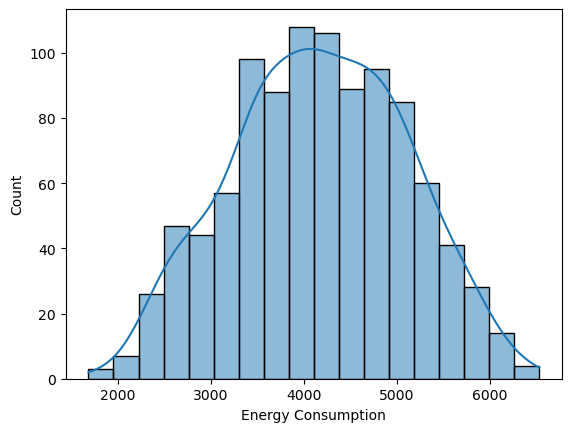

In [9]:
sns.histplot(train_df["Energy Consumption"], kde=True)
plt.show()

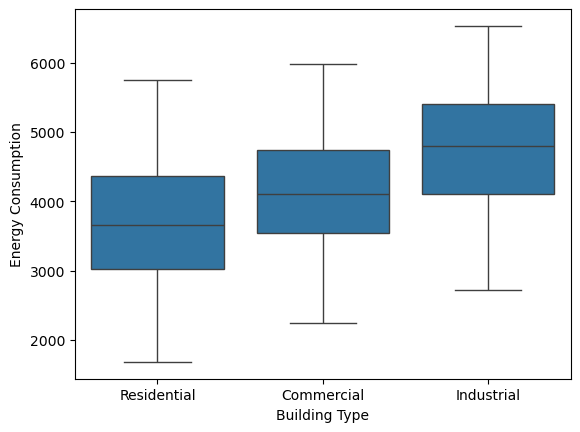

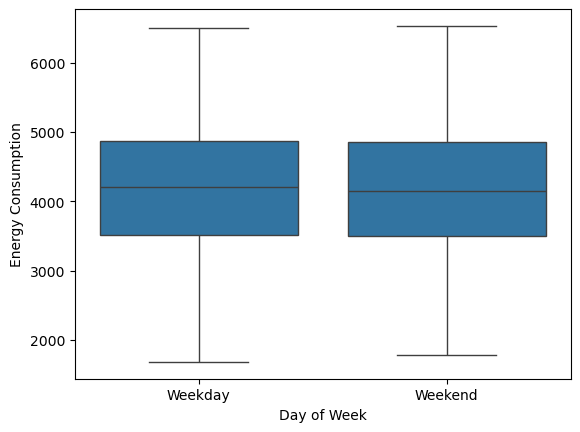

In [10]:
sns.boxplot(x="Building Type", y="Energy Consumption", data=train_df)
plt.show()

sns.boxplot(x="Day of Week", y="Energy Consumption", data=train_df)
plt.show()


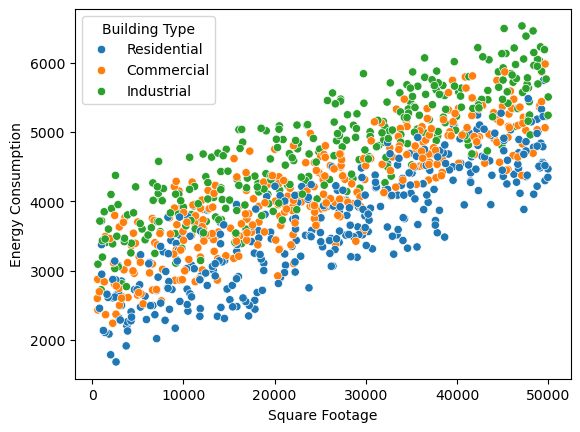

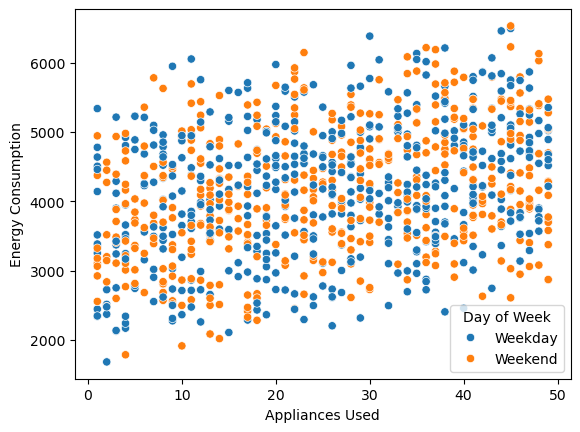

In [11]:
sns.scatterplot(x="Square Footage", y="Energy Consumption", hue="Building Type", data=train_df)
plt.show()

sns.scatterplot(x="Appliances Used", y="Energy Consumption", hue="Day of Week", data=train_df)
plt.show()

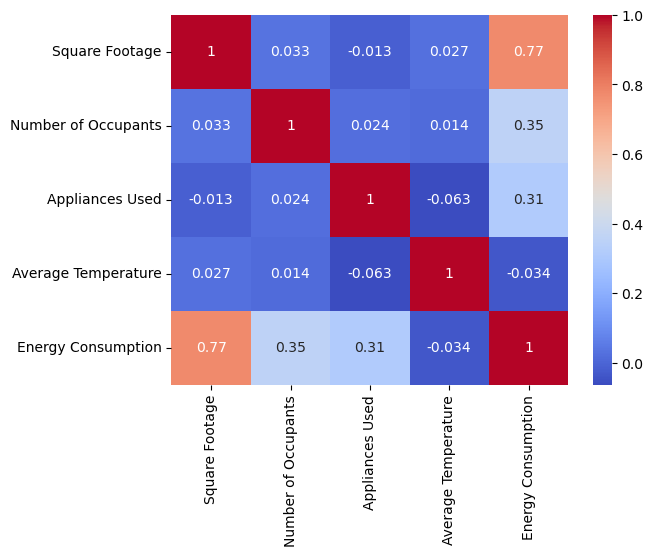

In [12]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


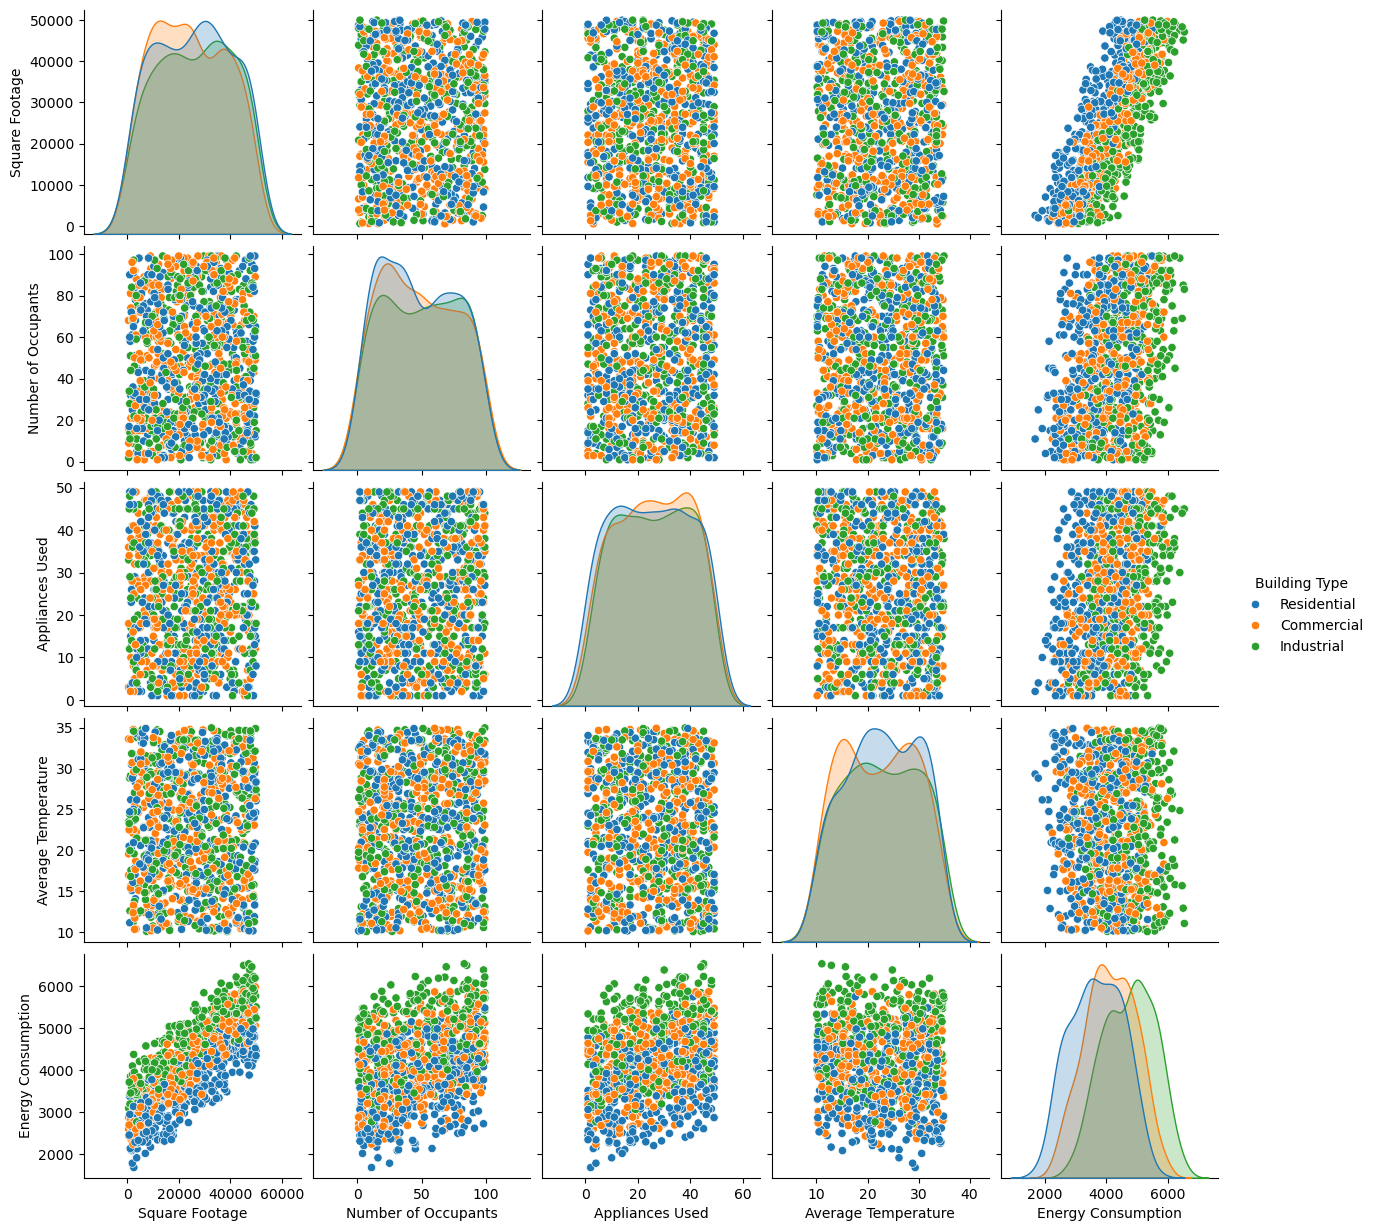

In [13]:
sns.pairplot(train_df, hue="Building Type")
plt.show()

In [14]:
train_df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


# Encoding

In [15]:
train_df['Building Type'].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

In [16]:
train_df['Day of Week'].value_counts()

Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64

In [17]:
X_train = train_df.drop('Energy Consumption', axis=1)
y_train = train_df['Energy Consumption']

X_test = test_df.drop('Energy Consumption', axis=1)
y_test = test_df['Energy Consumption']

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
one_hot_categories = [
    'Building Type',
    'Day of Week'
]

In [20]:
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_categories)
    ],
    remainder='passthrough'
)

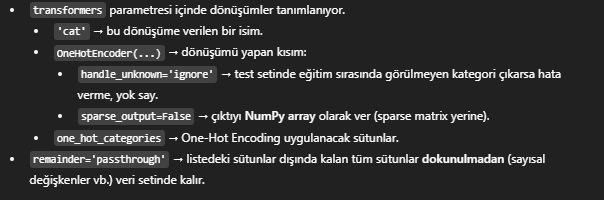

In [22]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [25]:
X_train_encoded

array([[ 0.  ,  0.  ,  1.  , ..., 76.  , 10.  , 29.84],
       [ 1.  ,  0.  ,  0.  , ..., 66.  , 45.  , 16.72],
       [ 0.  ,  1.  ,  0.  , ..., 37.  , 17.  , 14.3 ],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., 88.  , 20.  , 32.18],
       [ 0.  ,  0.  ,  1.  , ..., 67.  , 37.  , 16.48],
       [ 1.  ,  0.  ,  0.  , ..., 57.  , 11.  , 31.4 ]])

In [26]:
columns = encoder.get_feature_names_out()

In [27]:
columns

array(['onehot__Building Type_Commercial',
       'onehot__Building Type_Industrial',
       'onehot__Building Type_Residential', 'onehot__Day of Week_Weekday',
       'onehot__Day of Week_Weekend', 'remainder__Square Footage',
       'remainder__Number of Occupants', 'remainder__Appliances Used',
       'remainder__Average Temperature'], dtype=object)

In [28]:
X_train = pd.DataFrame(data = X_train_encoded, columns=columns, index=X_train.index)
X_test = pd.DataFrame(data = X_test_encoded, columns=columns, index=X_test.index)

# Scaling

In [30]:
from sklearn.preprocessing import RobustScaler

columns = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

# Model Training

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
def calculate_model_metric(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)

    return mse, mae, r2

In [36]:
models = {
    'Linear Regression' : LinearRegression(),
    'Elastic Net' : ElasticNet(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'SVR' : SVR(),
    'KNN' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
}

In [40]:
for i in range(len(list(models))):
    model_name = list(models.keys())[i]   # modelin adı
    model = list(models.values())[i]      # modelin kendisi
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mse, model_train_mae, model_train_r2 = calculate_model_metric(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_r2 = calculate_model_metric(y_test, y_test_pred)
    
    print(model_name)   # Burada artık isim çıkacak
    
    print("Train Mean Squared Error:", model_train_mse)
    print("Train Mean Absolute Error:", model_train_mae)
    print("Train R2 Score:", model_train_r2)
    print("------------------------------")
    
    print("Test Mean Squared Error:", model_test_mse)
    print("Test Mean Absolute Error:", model_test_mae)
    print("Test R2 Score:", model_test_r2)
    print("==============================")


Linear Regression
Train Mean Squared Error: 0.00018639499014605916
Train Mean Absolute Error: 0.011578839111350816
Train R2 Score: 0.9999999997858027
------------------------------
Test Mean Squared Error: 0.0002006200674555763
Test Mean Absolute Error: 0.012112609863306716
Test R2 Score: 0.9999999997076465
Elastic Net
Train Mean Squared Error: 302246.53785449755
Train Mean Absolute Error: 452.10454029564085
Train R2 Score: 0.6526709116557573
------------------------------
Test Mean Squared Error: 239976.4510922663
Test Mean Absolute Error: 398.38753246059457
Test R2 Score: 0.650294465365363
Lasso
Train Mean Squared Error: 21.712014501721875
Train Mean Absolute Error: 3.750669330600752
Train R2 Score: 0.9999750494604288
------------------------------
Test Mean Squared Error: 20.002540992930175
Test Mean Absolute Error: 3.6735223036790012
Test R2 Score: 0.9999708513095341
Ridge
Train Mean Squared Error: 7.1019068433326105
Train Mean Absolute Error: 2.190360589530499
Train R2 Score: 0.99